## **Modul 5 - Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**

Nama : Alfan Olivan

NIM : 2141720078

### **Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

> Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


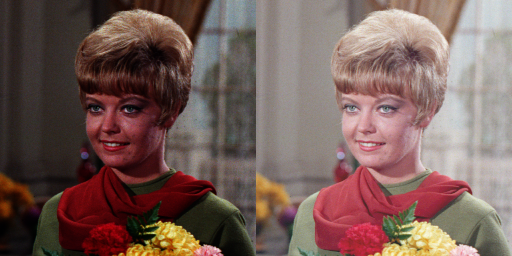

In [1]:
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img = cv2.imread("/content/drive/MyDrive/PCVK/female.tiff", cv2.IMREAD_COLOR)

def adjust_gamma(image, gamma):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

img_gamma = adjust_gamma(img, gamma)

# Concatenate the original and gamma-corrected images side by side
combined_image = np.hstack((img, img_gamma))

cv2_imshow(combined_image)

2. Buat Simulasi Image Depth

> Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

> Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.



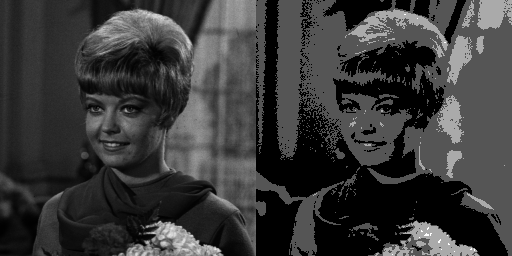

In [12]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv2.imread("/content/drive/MyDrive/PCVK/female.tiff", cv2.IMREAD_GRAYSCALE)
depth_image = np.round(original/level) * level

combined_image2 = np.hstack((original, depth_image))

cv2_imshow(combined_image2)

3. Buat modul Average Denoising

> Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.

> Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).



Average  5
PSNR:  27.53281409541419


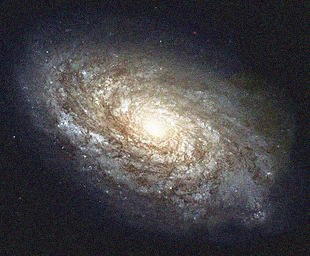



Average  10
PSNR:  27.548293564739442


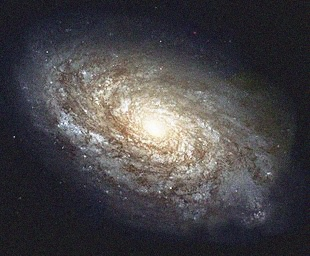



Average  20
PSNR:  27.518140581843056


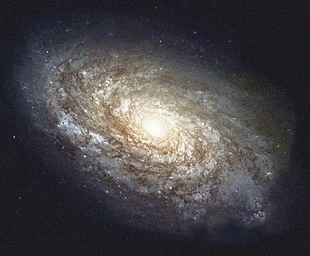



Average  40
PSNR:  27.4669781997476


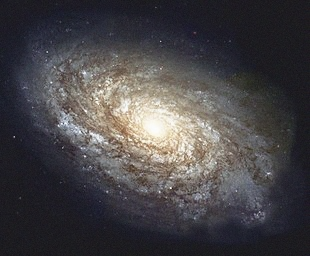



Average  80
PSNR:  27.399368375117078


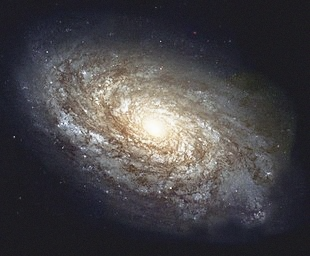



Average  100
PSNR:  27.370931279516654


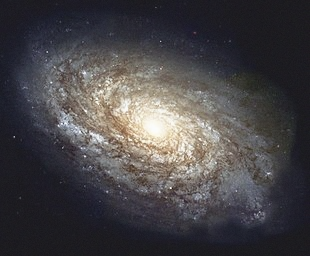

In [17]:
import glob

original = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

arr_image = []
jumlah_citra = [5, 10, 20, 40, 80, 100]

for _ in range(len(jumlah_citra)):
    arr_image.append(np.zeros(original.shape, original.dtype))

# Menyimpan 100 image yang telah diberi gaussian noise pada sebuah variabel menggunakan library glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n=cv2.imread(img)
  cv_img.append(n)

# Fungsi untuk menghitung nilai PSNR dengan membandingkan 2 gambar
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# Menghitung average citra
for citra in range(len(jumlah_citra)):
  for i in range(original.shape[0]):
    for j in range(original.shape[1]):
      for c in range(original.shape[2]):
        jumlah = 0
        average = 0
        for n in range(jumlah_citra[citra]):
          jumlah += cv_img[n][i,j,c]
        average = float(jumlah / jumlah_citra[citra])
        arr_image[citra][i,j,c] = average

for i in range(len(jumlah_citra)):
  print("Average ", jumlah_citra[i])
  print("PSNR: ", PSNR(original, arr_image[i]))
  cv2_imshow(arr_image[i])
  print("\n")



- Kesimpulan PSNR

> PSNR adalah metrik yang digunakan untuk mengukur kualitas gambar. Nilai PSNR yang lebih tinggi umumnya mengindikasikan kualitas gambar yang lebih baik, karena mewakili perbedaan yang lebih kecil antara gambar asli dan gambar yang dimodifikasi. Dalam data Anda, seiring dengan peningkatan tingkat perataan (averaging), nilai PSNR umumnya menurun. Ini mengimplikasikan bahwa gambar asli (tanpa averaging) memiliki kualitas gambar tertinggi (PSNR 27.53281409541419), sementara gambar dengan tingkat perataan tertinggi (100) memiliki kualitas gambar terendah (PSNR 27.370931279516654).

> Artinya, semakin tinggi tingkat perataan, semakin rendah nilai PSNR, yang berpotensi mengorbankan ketajaman dan detail gambar demi pengurangan noise. Pemilihan tingkat perataan yang optimal harus didasarkan pada kebutuhan aplikasi tertentu dan keseimbangan yang diinginkan antara pengurangan noise dan pelestarian detail.



4. Image Masking

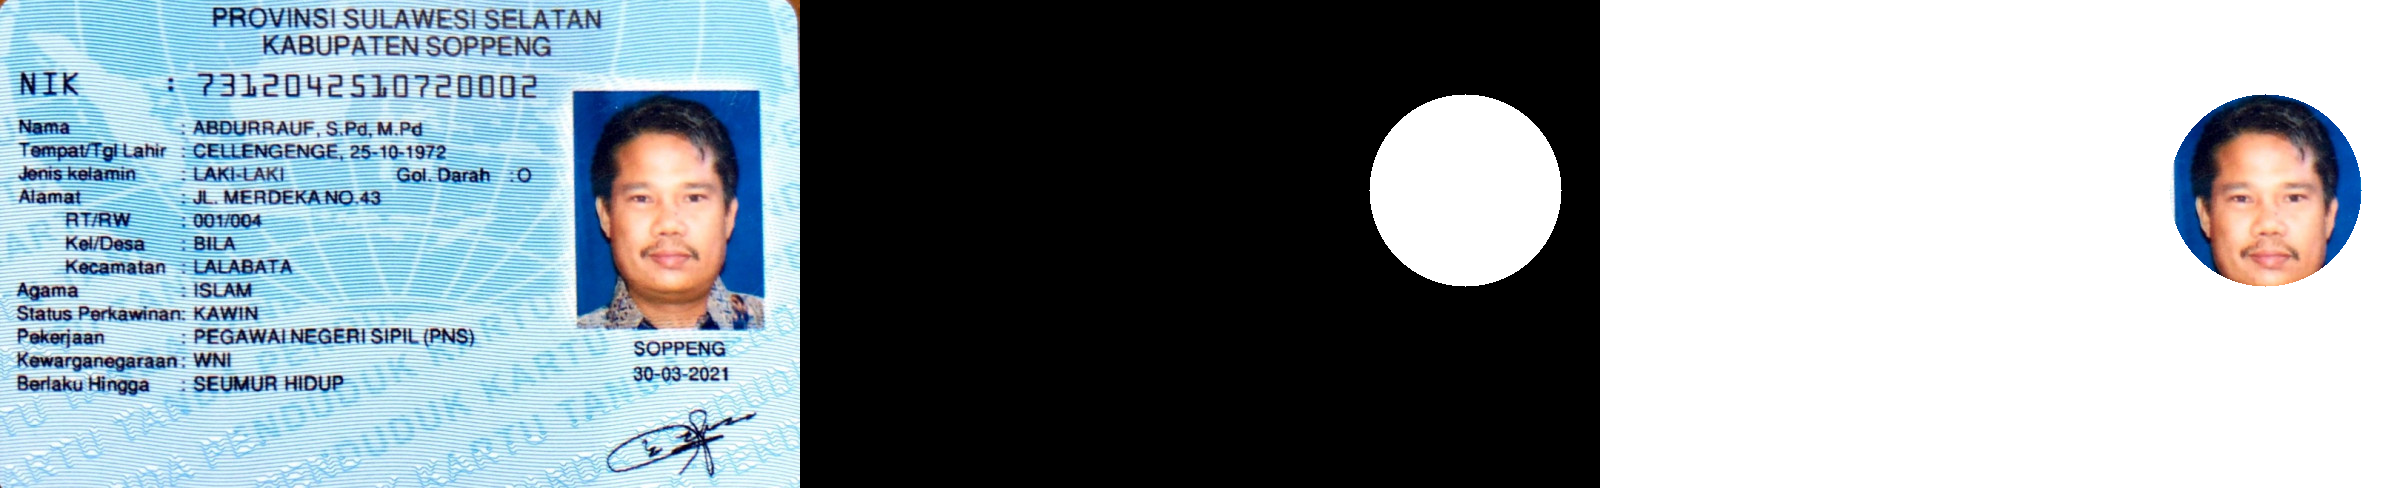

In [49]:
path='/content/drive/MyDrive/PCVK/ktp-test.png'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

cv2.circle(mask, (665, 190), 96, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(~KTP, mask)
masked_image = cv2.bitwise_not(masked_image)

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. Operasi Image

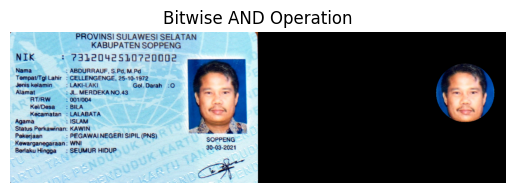

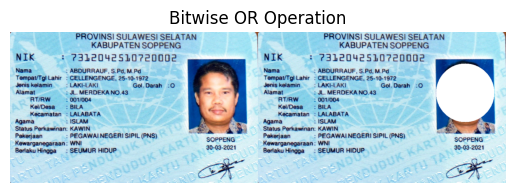

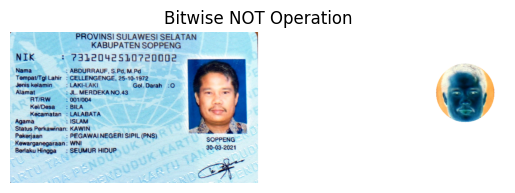

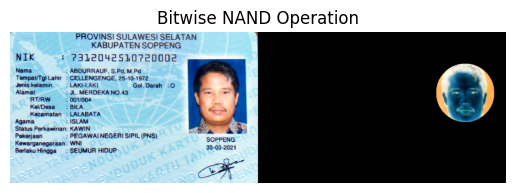

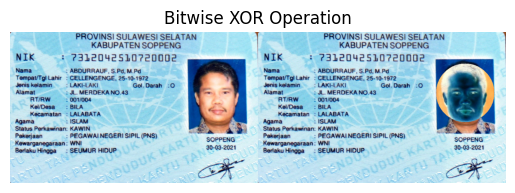

In [37]:
import matplotlib.pyplot as plt

def image_bitwise_operation(image, mask_center, mask_radius, operation):
    mask = np.zeros(image.shape, dtype=np.uint8)
    mask = cv2.circle(mask, radius=mask_radius, color=(255, 255, 255), thickness=-1, center=mask_center)

    if operation == 'and':
        result = cv2.bitwise_and(image, mask)
    elif operation == 'or':
        result = cv2.bitwise_or(image, mask)
    elif operation == 'not':
        result = cv2.bitwise_not(cv2.bitwise_and(image, mask))
    elif operation == 'nand':
        result = ~image & mask
        org_frame = cv2.hconcat((image, mask, result))
    elif operation == 'xor':
        result = cv2.bitwise_xor(image, mask)
    else:
        raise ValueError("Invalid operation")

    return result

operations = ['and', 'or', 'not', 'nand', 'xor']

mask_center = (668, 198)
mask_radius = 94

for operation in operations:
    result = image_bitwise_operation(KTP, mask_center, mask_radius, operation)

    final_frame = cv2.hconcat((KTP, result))
    plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Bitwise {operation.upper()} Operation')
    plt.axis('off')
    plt.show()


- Kesimpulan

> Operasi AND hanya akan menampilkan yang terdapat dalam radius masking saja, lalu untuk operasi OR akan menampilkan semua gambar kecuali gambar yang di masking. Selanjutnya adalah operasi NOT hanya akan menampilkan inverse dari hasil masking saja dan memutihkan semua warna yang tidak berada dalam area. Untuk operator NAND mirip seperti NOT tetapi yang membedakan operator ini akan menghitamkan semua warna yang tidak berada dalam area. Sedangkan utuk operator XOR akan menampilkan semua gambar dan akan meng-inverse area yang telah dimasking.